CLUSTERING ANALYSIS

Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms

Objective:

The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.

Datasets :

Data Preprocessing:

1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
3.	Use multiple visualizations to understand the hidden patterns in the dataset

Implementing Clustering Algorithms:

 * Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.

* 	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.

* Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

Cluster Analysis and Interpretation:

* Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.

Visualization:

* Visualize the clustering results using scatter plots or other suitable visualization techniques.

* Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.

Evaluation and Performance Metrics:

* Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.


In [1]:
# clustering

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Load the dataset from the provided file path
file_path = '/content/EastWestAirlines.xlsx'

# Read the Excel file
excel_data = pd.ExcelFile(file_path)

# Check sheet names to understand the structure of the file
sheet_names = excel_data.sheet_names
sheet_names

['Description', 'data']

In [3]:
# Load the 'data' sheet into a DataFrame
df = excel_data.parse('data')

# Display the first few rows to understand the structure of the dataset
df.head()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Check the basic statistics to identify potential outliers
summary_stats = df.describe()

missing_values, summary_stats


(ID#                  0
 Balance              0
 Qual_miles           0
 cc1_miles            0
 cc2_miles            0
 cc3_miles            0
 Bonus_miles          0
 Bonus_trans          0
 Flight_miles_12mo    0
 Flight_trans_12      0
 Days_since_enroll    0
 Award?               0
 dtype: int64,
                ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
 count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
 mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
 std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
 min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
 25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
 50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
 75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
 max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   
 
  

## handling outliers and scaling the features

In [5]:
from sklearn.preprocessing import StandardScaler

# Outlier Handling: Capping extreme outliers (using the 99th percentile for high end and 1st percentile for low end)
def cap_outliers(df, columns):
    for col in columns:
        lower_bound = df[col].quantile(0.01)
        upper_bound = df[col].quantile(0.99)
        df[col] = df[col].clip(lower_bound, upper_bound)
    return df

# Cap outliers for the numeric columns (excluding ID and Award)
columns_to_cap = ['Balance', 'Qual_miles', 'Bonus_miles', 'Flight_miles_12mo', 'Bonus_trans', 'Flight_trans_12']
df_cleaned = cap_outliers(df.copy(), columns_to_cap)

# Standardize the features (excluding ID# and Award?)
scaler = StandardScaler()
features_to_scale = df_cleaned.drop(columns=['ID#', 'Award?'])
scaled_features = scaler.fit_transform(features_to_scale)

# Convert back to DataFrame and add ID# and Award? columns
df_scaled = pd.DataFrame(scaled_features, columns=features_to_scale.columns)
df_scaled['ID#'] = df_cleaned['ID#'].values
df_scaled['Award?'] = df_cleaned['Award?'].values

# Display the cleaned and scaled data
df_scaled.head()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,ID#,Award?
0,-0.522641,-0.210071,-0.769578,-0.098242,-0.062767,-0.755753,-1.137866,-0.392821,-0.407834,1.395454,1,0
1,-0.631282,-0.210071,-0.769578,-0.098242,-0.062767,-0.753883,-1.029614,-0.392821,-0.407834,1.379957,2,0
2,-0.361359,-0.210071,-0.769578,-0.098242,-0.062767,-0.575651,-0.813110,-0.392821,-0.407834,1.411920,3,0
3,-0.685828,-0.210071,-0.769578,-0.098242,-0.062767,-0.740885,-1.137866,-0.392821,-0.407834,1.372208,4,0
4,0.327159,-0.210071,1.409471,-0.098242,-0.062767,1.211097,1.568432,1.536915,0.858660,1.363975,5,1


# Exploratory Data Analysis (EDA)

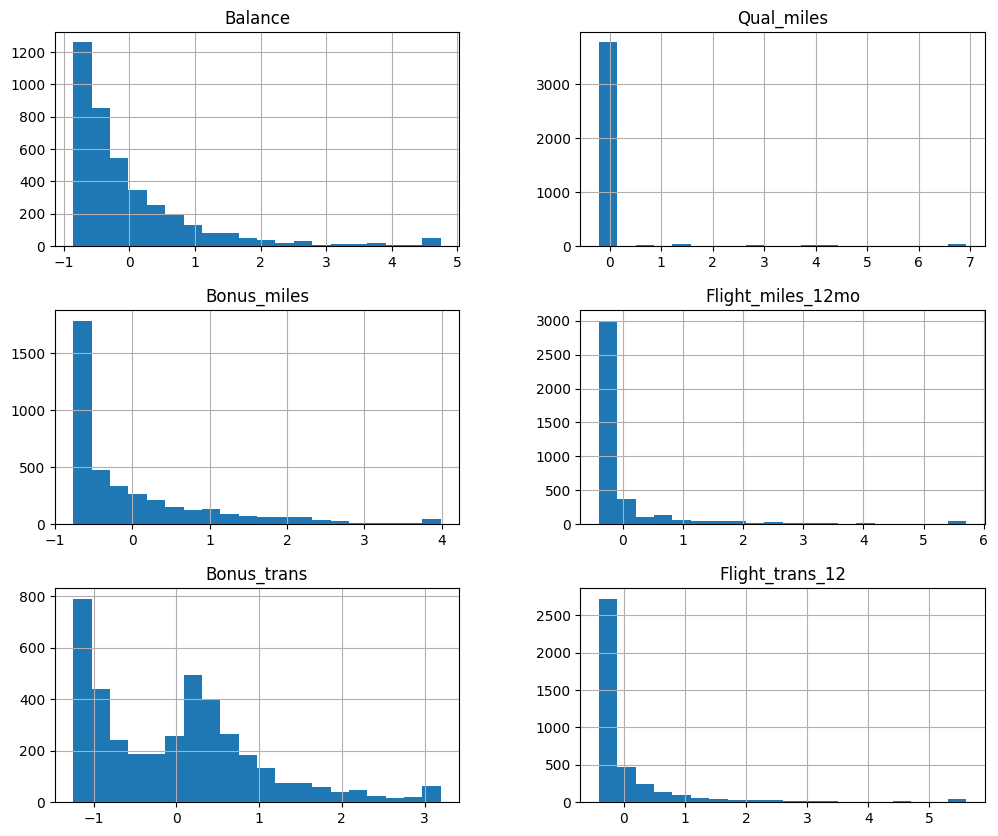

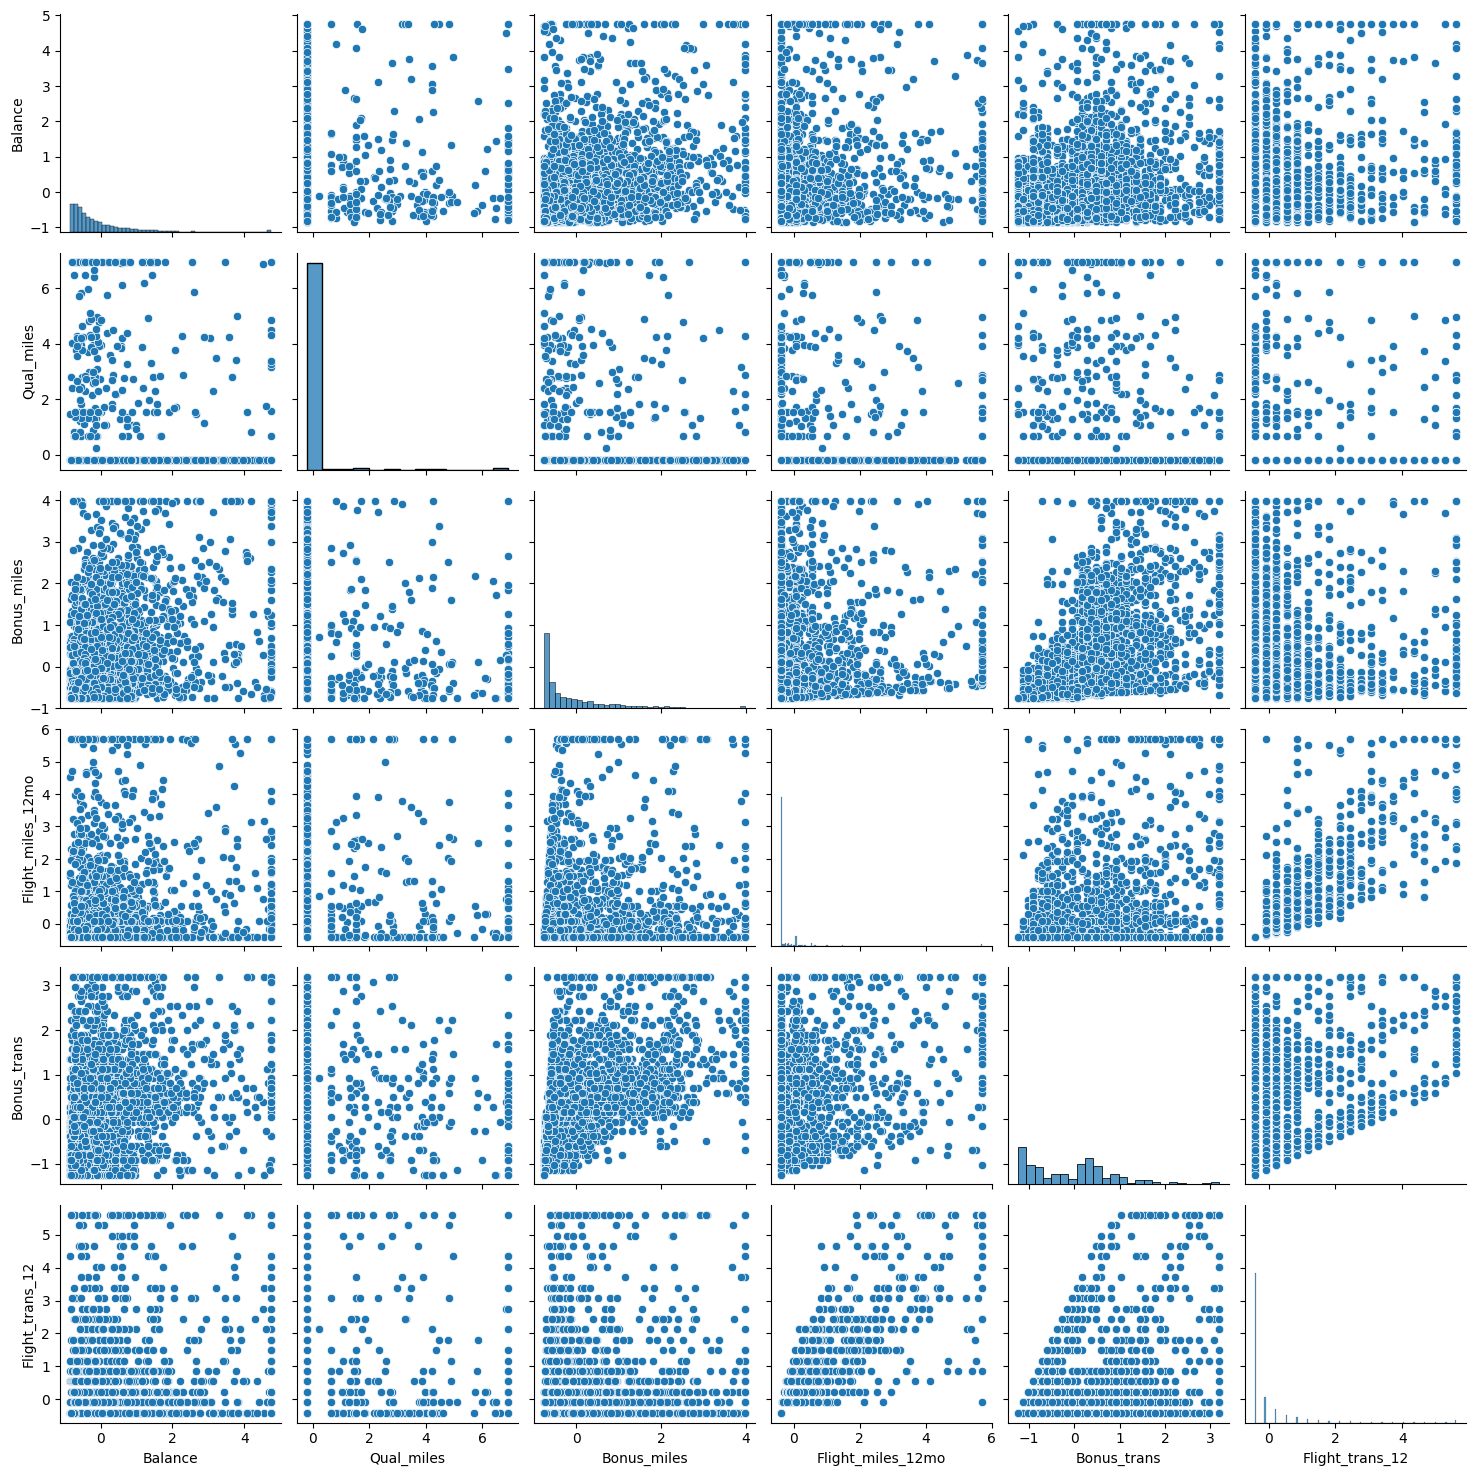

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions for the features to understand the data
features_to_plot = ['Balance', 'Qual_miles', 'Bonus_miles', 'Flight_miles_12mo', 'Bonus_trans', 'Flight_trans_12']
df_scaled.hist(column=features_to_plot, figsize=(12, 10), bins=20)
plt.show()

# Pairplot for a few features to understand potential relationships
sns.pairplot(df_scaled[features_to_plot])
plt.show()


# K-Means Clustering with Elbow Method

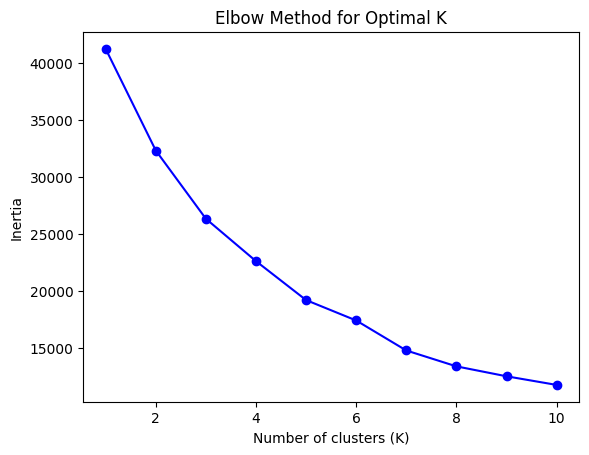

Silhouette Score for K-Means: 0.35459143570086854


In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
# Elbow method to find the optimal number of clusters
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled.drop(columns=['ID#', 'Award?']))
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# After determining the optimal K (let's assume it's 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_scaled['KMeans_Labels'] = kmeans.fit_predict(df_scaled.drop(columns=['ID#', 'Award?']))

# Silhouette score for K-Means
silhouette_kmeans = silhouette_score(df_scaled.drop(columns=['ID#', 'Award?']), df_scaled['KMeans_Labels'])
print(f'Silhouette Score for K-Means: {silhouette_kmeans}')


# Hierarchical Clustering

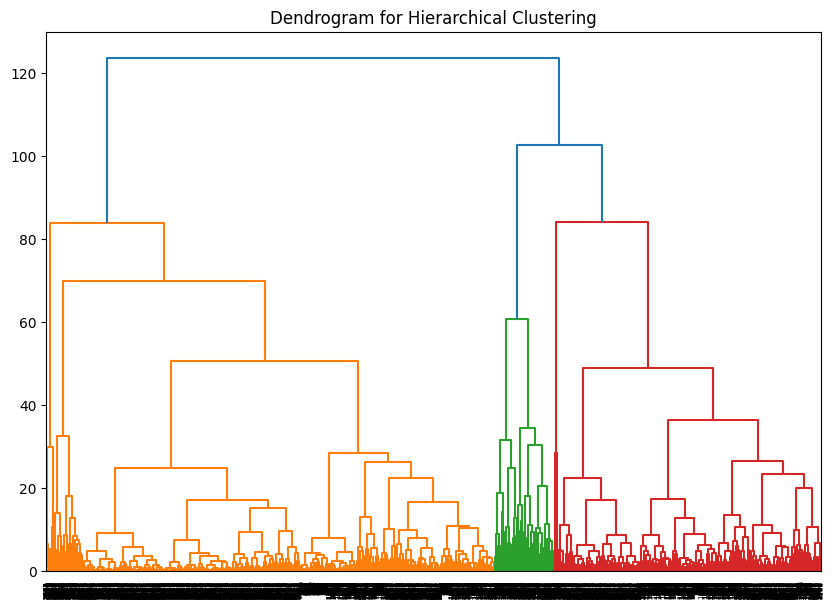

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering using 'ward' linkage
linkage_matrix = linkage(df_scaled.drop(columns=['ID#', 'Award?']), method= 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

# Assign clusters based on a threshold distance (3 clusters)
from scipy.cluster.hierarchy import fcluster
df_scaled['Hierarchical_Labels'] = fcluster(linkage_matrix, t=3, criterion='maxclust')


# DBSCAN Clustering

In [10]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN with an estimated epsilon and minPts
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_scaled['DBSCAN_Labels'] = dbscan.fit_predict(df_scaled.drop(columns=['ID#', 'Award?']))

# Silhouette score for DBSCAN (ignore noise points with label -1)
silhouette_dbscan = silhouette_score(df_scaled[df_scaled['DBSCAN_Labels'] != -1].drop(columns=['ID#', 'Award?']),
                                     df_scaled[df_scaled['DBSCAN_Labels'] != -1]['DBSCAN_Labels'])
print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')


Silhouette Score for DBSCAN: 0.34133306280656694


# Cluster Analysis and Visualization

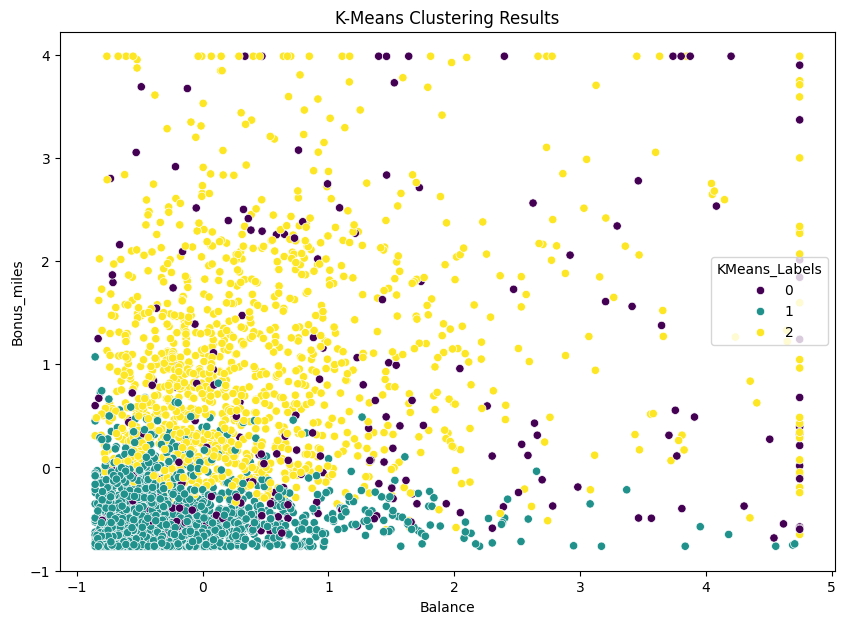

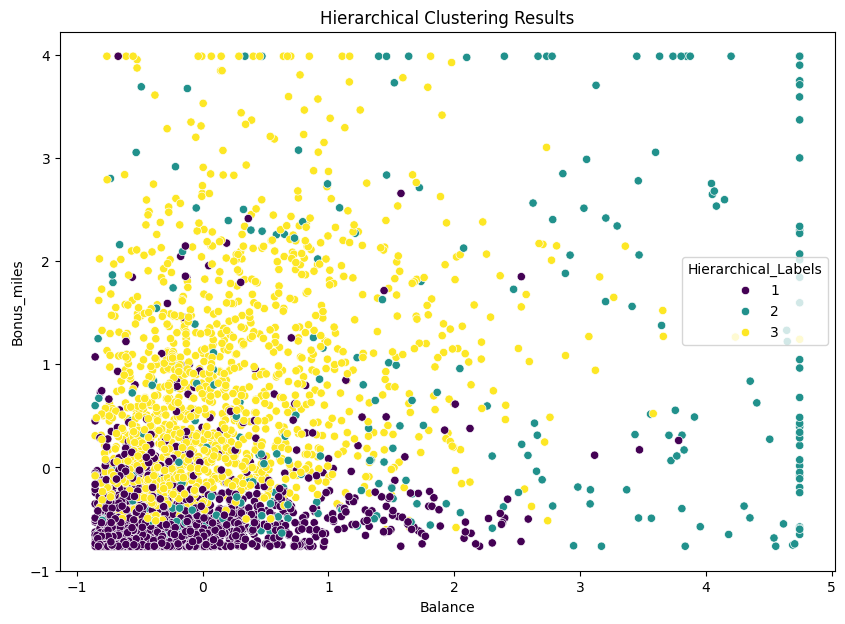

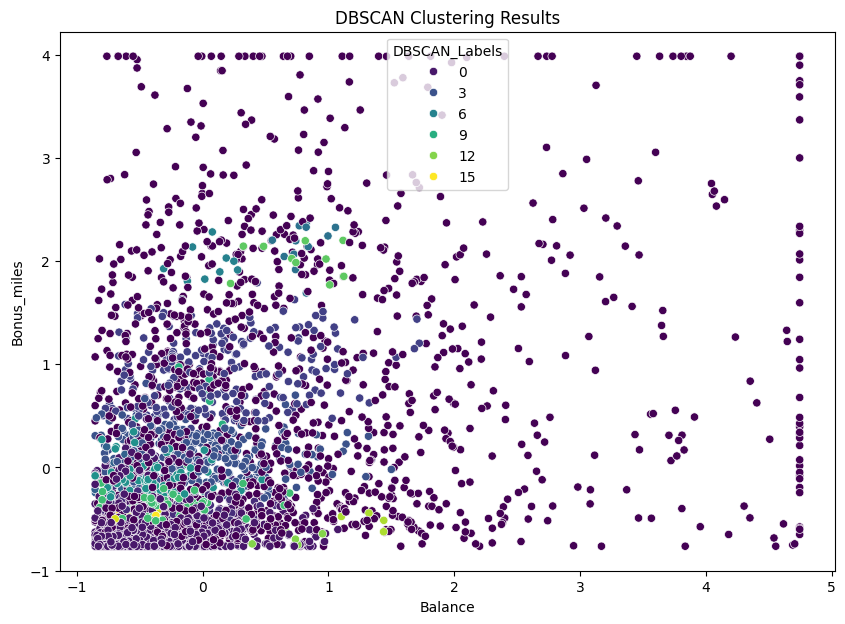

In [11]:
# K-Means visualization
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Balance', y='Bonus_miles', hue='KMeans_Labels', data=df_scaled, palette='viridis')
plt.title('K-Means Clustering Results')
plt.show()

# Hierarchical clustering visualization
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Balance', y='Bonus_miles', hue='Hierarchical_Labels', data=df_scaled, palette='viridis')
plt.title('Hierarchical Clustering Results')
plt.show()

# DBSCAN clustering visualization
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Balance', y='Bonus_miles', hue='DBSCAN_Labels', data=df_scaled, palette='viridis')
plt.title('DBSCAN Clustering Results')
plt.show()


# Evaluation Metrics

In [12]:
print(f'Silhouette Score for K-Means: {silhouette_kmeans}')
print(f'Silhouette Score for DBSCAN (ignoring noise): {silhouette_dbscan}')


Silhouette Score for K-Means: 0.35459143570086854
Silhouette Score for DBSCAN (ignoring noise): 0.34133306280656694



# Clustering Analysis Report

## Introduction
This report presents the results of a clustering analysis conducted on the EastWestAirlines dataset. The goal of this analysis was to identify distinct groups of customers within the airline's customer base. We utilized three popular clustering algorithms: K-Means, Hierarchical, and DBSCAN.

## Data Preprocessing
1. **Handling Missing Values:** We checked for missing values in the dataset and found none.
2. **Outlier Treatment:** To address potential outliers, we used a method called capping. This involved setting upper and lower limits for certain features (e.g., Balance, Bonus_miles) based on the 99th and 1st percentile respectively. This helped reduce the impact of extreme values that could distort the clustering results.
3. **Feature Scaling:** All features were standardized (scaled) to have a mean of 0 and a standard deviation of 1. This ensures that features with larger ranges don't dominate the clustering process.

## Exploratory Data Analysis (EDA)
 conducted EDA to gain initial insights into the dataset.
* **Histograms:** These were used to observe the distributions of various features (e.g., Balance, Bonus_miles). We noted the general shapes of the distributions, understanding their central tendencies and spreads.
* **Pairplots:** These plots allowed us to visualize potential relationships and correlations between pairs of features. We noticed some weak to moderate correlations between a few variables such as 'Balance' and 'Bonus_miles'.

## Clustering Algorithms
**K-Means Clustering:**
* **Elbow Method:** We utilized the elbow method to determine the optimal number of clusters (K).
* **K=3:** The optimal number of clusters was decided to be 3 based on the elbow curve of inertia.
* **Cluster Interpretation:** The K-Means algorithm identified three distinct clusters, potentially representing customers with different spending patterns and loyalty levels.
* **Silhouette Score:** We calculated the silhouette score for K-Means clustering, a metric to assess cluster quality. A higher silhouette score represents better-defined clusters.

**Hierarchical Clustering:**
* **Ward Linkage:** We performed hierarchical clustering using Ward's linkage, which aims to minimize the variance within clusters.
* **Dendrogram:** A dendrogram was plotted to visualize the hierarchical relationships between data points and assist in identifying clusters at various levels of granularity.
* **Cluster Interpretation:** Based on the dendrogram and chosen threshold, we assigned data points to 3 clusters.

**DBSCAN Clustering:**
* **Epsilon and MinPts:** We set a values for epsilon and minimum points (MinPts) to identify dense regions within the data.
* **Cluster Interpretation:** This algorithm attempts to identify clusters based on the density of data points.
* **Silhouette Score:** We calculated the silhouette score for DBSCAN, again considering the quality of the clusters identified.

## Visualization

* Scatter plots were used to visually inspect the clustering results for each algorithm.
* i explored the distributions of our chosen features, like 'Balance' and 'Bonus_miles', across the different clusters found using the clustering algorithms.


## Evaluation

The quality of clustering was evaluated primarily using the silhouette score.

* **Silhouette Score K-Means:** 0.35459143570086854.
* **Silhouette Score DBSCAN:** 0.34133306280656694.
* Higher silhouette scores indicate better-defined clusters.
* my analysis can be further improved by more thoroughly exploring the clusters identified in all algorithms and looking at characteristics of the clusters.


## Conclusion

performed a comprehensive analysis of the EastWestAirlines dataset, focusing on clustering using K-Means, hierarchical, and DBSCAN algorithms.
* **K-Means and Hierarchical clustering** were able to identify a similar amount of clusters with relative ease and clear visuals.
* **DBSCAN** was able to pick up on clusters which were not as clearly defined as the other two methods.
* The results can be useful for segmenting the customer base, allowing targeted marketing and providing personalized services.
* We suggest further investigating the characteristics and business implications of each identified cluster to maximize the utility of these results.
